In [1]:
import tensorflow as tf
from keras.utils import np_utils
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
#Initialize train, val and test arrays
x_train = np.empty([1,28,28], dtype="uint8")
y_train = np.empty(1, dtype="uint8")
x_val = np.empty([1,28,28], dtype="uint8")
y_val = np.empty(1, dtype="uint8")
x_test = np.empty([1,28,28], dtype="uint8")
y_test = np.empty(1, dtype="uint8")

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#!unzip -uq "path/folder(0)" -d "path/"

In [0]:
import os
from PIL import Image

def load_images_to_data(image_label, image_directory, features_data, label_data, ext):
    list_of_files = os.listdir(image_directory)
    for file in list_of_files:
        image_file_name = image_directory + "/" + file
        if ext in image_file_name:
            img = Image.open(image_file_name).convert("L")
            img = np.resize(img, (28,28,1))
            im2arr = np.array(img)
            im2arr = im2arr.reshape(1,28,28,1)
            features_data = np.append(features_data, np.squeeze(im2arr,axis=3), axis=0)
            label_data = np.append(label_data, [image_label], axis=0)
    return features_data, label_data

In [0]:
letter_dict = {
    "10" : "A",
    "11" : "B",
    "12" : "C",
    "13" : "D",
    "14" : "E",
    "15" : "F",
    "16" : "G",
    "17" : "H",
    "18" : "I",
    "19" : "J",
    "20" : "K",
    "21" : "L",
    "22" : "M",
    "23" : "N",
    "24" : "O",
    "25" : "P",
    "26" : "Q",
    "27" : "R",
    "28" : "S",
    "29" : "T",
    "30" : "U",
    "31" : "V",
    "32" : "W",
    "33" : "X",
    "34" : "Y",
    "35" : "Z",
}

In [0]:
test_letter_dict = {
    "10" : "A",
    "11" : "B",
    "12" : "C",
    "13" : "D",
    "14" : "E",
    "15" : "F",
    "16" : "G",
    "17" : "H",
    "18" : "I",
    "19" : "J",
    "21" : "L",
    "22" : "M",
    "23" : "N",
    "25" : "P",
    "27" : "R",
    "28" : "S",
    "29" : "T",
    "31" : "V",
    "33" : "X",
    "35" : "Z",
}

In [0]:
dir_train = "/content/gdrive/My Drive/Recognition_Dataset_Train/"
dir_val = "/content/gdrive/My Drive/Recognition_Dataset_Validation/"
dir_test = "/content/gdrive/My Drive/Recognition_Dataset_Test/"

In [0]:
for i in letter_dict.keys():
  x_train, y_train = load_images_to_data(i, dir_train + letter_dict[i], x_train, y_train, ".jpg")
  x_val, y_val = load_images_to_data(i, dir_val + letter_dict[i], x_val, y_val, ".jpg")

In [0]:
for i in range(10):
  x_train, y_train = load_images_to_data(str(i), dir_train + str(i), x_train, y_train, ".jpg")
  x_val, y_val = load_images_to_data(str(i), dir_val + str(i), x_val, y_val, ".jpg")
  x_test, y_test = load_images_to_data(str(i), dir_test + str(i), x_test, y_test, ".png")

In [0]:
for i in test_letter_dict.keys():
  x_test, y_test = load_images_to_data(i, dir_test + letter_dict[i], x_test, y_test, ".png")

In [0]:
xt_orig = x_train
yt_orig = y_train
xv_orig = x_val
yv_orig = y_val
x_orig = x_test
y_orig = y_test

In [0]:
x_train = xt_orig
y_train = yt_orig
x_val = xv_orig
y_val = yv_orig
x_test = x_orig
y_test = y_orig

10


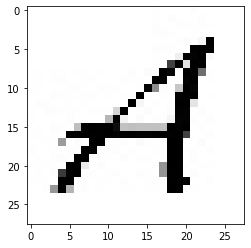

In [12]:
image_index = 120 
print(y_train[image_index]) 
plt.imshow(x_train[image_index], cmap='Greys')

In [0]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(29233, 28, 28)
(29233,)
(7345, 28, 28)
(7345,)


In [0]:
print(x_test.shape)
print(y_test.shape)

(2979, 28, 28)
(2979,)


In [0]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_val = x_val.reshape(x_val.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_val /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_val', x_val.shape[0])

x_train shape: (29233, 28, 28, 1)
Number of images in x_train 29233
Number of images in x_val 7345


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
def create_model():
  model = Sequential()
  model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.3))
  model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.3))
  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(36,activation=tf.nn.softmax))
  return model

In [0]:
model = create_model()
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1568)             

In [0]:
from keras.callbacks import ModelCheckpoint
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
checkpoint_path = "/content/gdrive/My Drive/Checkpoints_EMNIST/cp4.ckpt"
checkpoint_dir = "/content/gdrive/My Drive/Checkpoints_EMNIST/cp4.ckpt"
cp_callback = ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, verbose=1)
history = model.fit(x=x_train,y=y_train, batch_size=1024, epochs=100, validation_data=(x_val, y_val), callbacks=[cp_callback], shuffle=True)

Train on 29233 samples, validate on 7345 samples
Epoch 1/100
29233/29233 [==============================] - 31s 1ms/step - loss: 2.6605 - accuracy: 0.2888 - val_loss: 1.2041 - val_accuracy: 0.7325

Epoch 00001: saving model to /content/gdrive/My Drive/Checkpoints_EMNIST/cp4.ckpt
Epoch 2/100
29233/29233 [==============================] - 30s 1ms/step - loss: 1.2152 - accuracy: 0.6696 - val_loss: 0.6276 - val_accuracy: 0.8474

Epoch 00002: saving model to /content/gdrive/My Drive/Checkpoints_EMNIST/cp4.ckpt
Epoch 3/100
29233/29233 [==============================] - 30s 1ms/step - loss: 0.8567 - accuracy: 0.7674 - val_loss: 0.4895 - val_accuracy: 0.8752

Epoch 00003: saving model to /content/gdrive/My Drive/Checkpoints_EMNIST/cp4.ckpt
Epoch 4/100
29233/29233 [==============================] - 30s 1ms/step - loss: 0.7158 - accuracy: 0.8083 - val_loss: 0.4216 - val_accuracy: 0.8888

Epoch 00004: saving model to /content/gdrive/My Drive/Checkpoints_EMNIST/cp4.ckpt
Epoch 5/100
29233/29233 [==

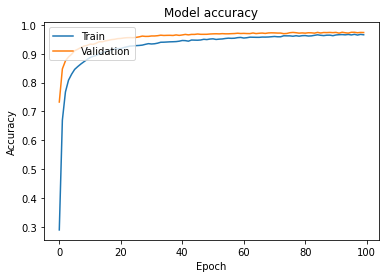

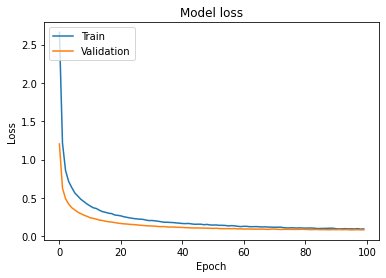

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig("/content/gdrive/My Drive/Checkpoints_EMNIST/acc1.png", bbox_inches='tight')
plt.show()


# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig("/content/gdrive/My Drive/Checkpoints_EMNIST/loss1.png", bbox_inches='tight')
plt.show()


In [0]:
model.evaluate(x_val, y_val)

7345/7345 [==============================] - 2s 284us/step


[0.0844577991115028, 0.9735874533653259]

(28, 28)
<class 'numpy.ndarray'>
0


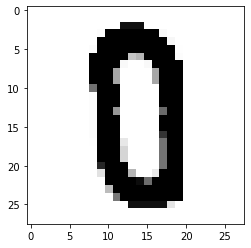

In [0]:
image_index = 100
print(x_test[image_index].shape)
print(type(x_test[image_index]))
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

In [0]:
import pathlib
data = pathlib.Path('/content/gdrive/My Drive/Recognition_Dataset_Test/Z') 
test_data = list(data.glob('*.png'))
print(test_data[0])
count = len(test_data)
count

/content/gdrive/My Drive/Recognition_Dataset_Test/Z/237__2.png


45

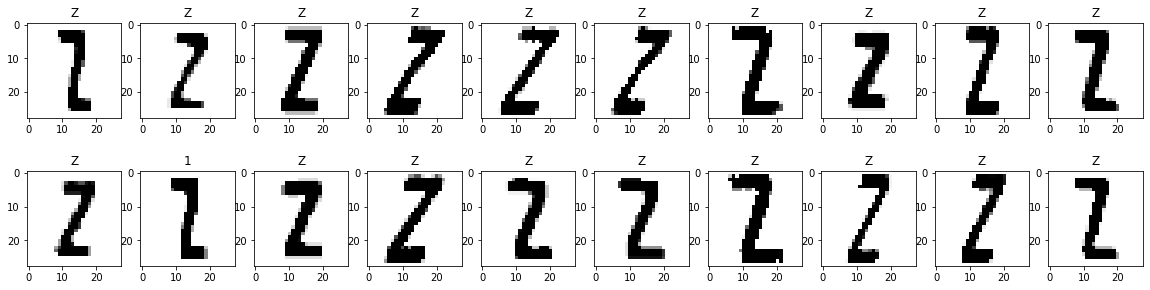

In [0]:
from PIL import Image
import numpy as np
fig = plt.figure(figsize = (20, 5))
count = 0
for image_path in test_data[0:20]:
    a = Image.open(str(image_path))
    a = a.resize((28,28))
    k = np.asarray(a)
    e =  np.expand_dims(k, axis=2)
    ax = fig.add_subplot(2, 10, count+1)
    plt.imshow(k,cmap='Greys')
    pred = model.predict(e.reshape(1, 28, 28, 1))
    if(pred.argmax() > 9):
      res = letter_dict[str(pred.argmax())]
    else:
      res = pred.argmax()
    count +=1
    ax.set_title(res)

In [0]:
#new_model = create_model()
#new_model.load_weights("/content/gdrive/My Drive/Checkpoints_EMNIST/cp.ckpt")

In [0]:
xnew_val = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
xnew_val = xnew_val.astype('float32')
xnew_val /= 255
model.evaluate(xnew_val, y_test)

2979/2979 [==============================] - 1s 283us/step


[0.3295752756256331, 0.9328633546829224]